# Assignment 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## **Problem 10.**
First just using the provided code.

(-2.4255869235758625,
 5.364641637706226,
 -2.9777593650417957,
 4.812469196240293)

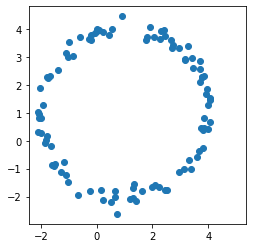

In [3]:
# we assume that we don't know true r and c and instead solve a minimization problem to find them
def generate_circular_shape(N, c = np.array([1.0, 1.0]), r = 3.0, seed=42):
    np.random.seed(seed)
    alpha = np.random.rand(N) * 2 * np.pi
    xi = r * np.cos(alpha) + np.random.randn(N)*0.1 + c[0]
    yi = r * np.sin(alpha) + np.random.randn(N)*0.2 + c[1]
    return xi, yi

# example run
x_data, y_data = generate_circular_shape(100)
plt.scatter(x_data, y_data)
plt.axis('square')


Implementing our objective function and its gradient.

In [4]:
# our objective function
def f(x, y, r, x_data, y_data):
    return np.sum((x - x_data)**2 + (y - y_data)**2 - r**2)**2

# the gradient of our objective function
def grad_f(x, y, r, x_data, y_data):
    partial_x = 4 * np.sum(((x - x_data)**2 + (y - y_data)**2 - r**2) * (x - x_data))
    partial_y = 4 * np.sum(((x - x_data)**2 + (y - y_data)**2 - r**2) * (y - y_data))
    partial_r = -4 * np.sum(((x - x_data)**2 + (y - y_data)**2 - r**2) * r)

    return np.array([partial_x, partial_y, partial_r])


Implementing gradient descent for this specific function.

In [5]:
# implementing gradient descent
def gradient_descent(x_data, y_data, learning_rate=0.0001, epochs=1000, seed=42):
    np.random.seed(seed)

    # initial guess for the center (x, y) and radius r
    x, y, r = np.random.rand(3)

    for epoch in range(epochs):
        grad = grad_f(x, y, r, x_data, y_data)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        r -= learning_rate * grad[2]
        # print the objective function value every 100 epochs
        if epoch % 100 == 0:
            cost = f(x, y, r, x_data, y_data)
            print(f"Epoch {epoch}, Cost: {cost}")

    return x, y, r


Implementing a function, which runs gradient descent for this very function for a given number of N  points, and creating the plots which shows how well the final solution represent the shape of the data.

In [6]:
# implementing a solver function
def solve_and_plot(N, learning_rate=0.0001, epochs=1000, seed=42):
    x_data, y_data = generate_circular_shape(N, seed=seed)
    x, y, r = gradient_descent(x_data, y_data, learning_rate, epochs, seed)
    print(f'The centre of the solution is {x, y}, the radius is {r}.')
    plt.figure(figsize=(8, 8))
    plt.scatter(x_data, y_data, label='Data', color='red')
    plt.scatter(1, 1, label='Center of Final Solution', color='blue')
    theta = np.linspace(0, 2*np.pi, 100)
    x_coor = x + r * np.cos(theta)
    y_coor = y + r * np.sin(theta)
    plt.plot(x_coor, y_coor, label='Final Solution', color='blue')
    plt.axis('square')
    plt.legend(loc='upper right')
    return x, y, r

### N = 20

Epoch 0, Cost: 34030.7471046822
Epoch 100, Cost: 0.00024918459383899827
Epoch 200, Cost: 6.983795097563238e-11
Epoch 300, Cost: 4.436062362972857e-17
Epoch 400, Cost: 5.125996152906879e-23
Epoch 500, Cost: 2.6707674807162576e-26
Epoch 600, Cost: 3.315187954191302e-26
Epoch 700, Cost: 3.315187954191302e-26
Epoch 800, Cost: 3.315187954191302e-26
Epoch 900, Cost: 3.315187954191302e-26
The centre of the solution is (0.9422918160806104, 0.948241665646537), the radius is 3.0583394504932633.


(0.9422918160806104, 0.948241665646537, 3.0583394504932633)

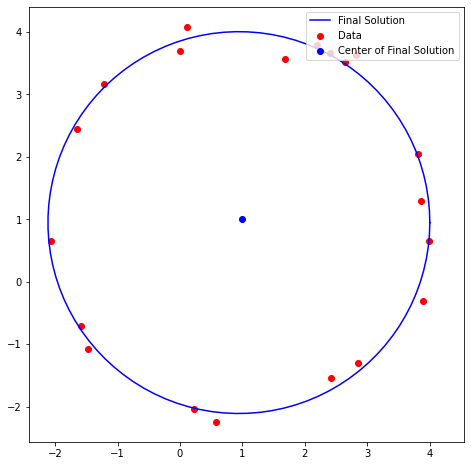

In [7]:
solve_and_plot(20)

### N = 100

Epoch 0, Cost: 677001.3757772963
Epoch 100, Cost: 4.799429747364636e-27
Epoch 200, Cost: 4.799429747364636e-27
Epoch 300, Cost: 4.799429747364636e-27
Epoch 400, Cost: 4.799429747364636e-27
Epoch 500, Cost: 4.799429747364636e-27
Epoch 600, Cost: 4.799429747364636e-27
Epoch 700, Cost: 4.799429747364636e-27
Epoch 800, Cost: 4.799429747364636e-27
Epoch 900, Cost: 4.799429747364636e-27
The centre of the solution is (0.9828818459630775, 0.9997700298651881), the radius is 3.033862396357711.


(0.9828818459630775, 0.9997700298651881, 3.033862396357711)

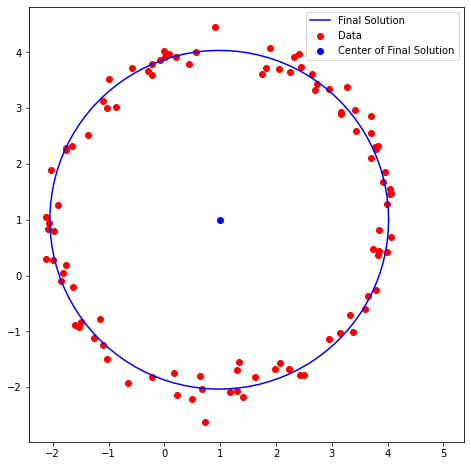

In [8]:
solve_and_plot(100)

### N = 1000

Epoch 0, Cost: 64741630.309410535
Epoch 100, Cost: 1.9721522630525295e-25
Epoch 200, Cost: 1.9721522630525295e-25
Epoch 300, Cost: 1.9721522630525295e-25
Epoch 400, Cost: 1.9721522630525295e-25
Epoch 500, Cost: 1.9721522630525295e-25
Epoch 600, Cost: 1.9721522630525295e-25
Epoch 700, Cost: 1.9721522630525295e-25
Epoch 800, Cost: 1.9721522630525295e-25
Epoch 900, Cost: 1.9721522630525295e-25
The centre of the solution is (1.0093252858768547, 1.0114511081431696), the radius is 2.9987499873352506.


(1.0093252858768547, 1.0114511081431696, 2.9987499873352506)

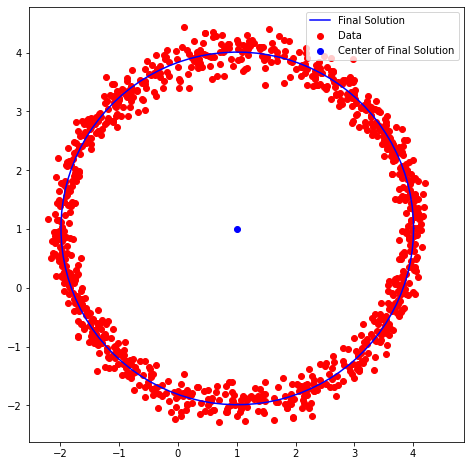

In [9]:
solve_and_plot(1000, learning_rate=0.00001)

In both cases we were able to appromate quite well the real solutions, and es expected increasing the number of points leads to better results.

## **Problem 13.**

First implementing a function, which calculates d_k.

In [17]:
# the Gauss Newton Direction times the gradient of our objective function
def GN_direction(x, y, r, x_data, y_data):
    partial_sum = np.zeros([3, 3])
    for i in range(len(x_data)):
        partial_x = 2 * (x - x_data[i])
        partial_y = 2 * (y - y_data[i])
        partial_r = -2 * r
        partial = np.array([[partial_x], [partial_y], [partial_r]])
        partial_sum += partial @ partial.T
    return np.linalg.inv(partial_sum) @ grad_f(x, y, r, x_data, y_data)


Implementing the Gauss-Newton method for this specific function.

In [34]:
# implementing Gauss-Newton method
def gauss_newton(x_data, y_data, step_size=1, epochs=1000, seed=42):
    np.random.seed(seed)

    # initial guess for the center (x, y) and radius r
    x, y, r = np.random.rand(3)
    costs = []
    norms = []
    for epoch in range(epochs):
        grad = GN_direction(x, y, r, x_data, y_data)
        x -= step_size * grad[0]
        y -= step_size * grad[1]
        r -= step_size * grad[2]
        cost = f(x, y, r, x_data, y_data)
        costs.append(cost)
        norm = np.linalg.norm(grad_f(x, y, r, x_data, y_data))
        norms.append(norm)
        # print the objective function value every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return x, y, r, costs, norms


Implementing a function, which runs gradient descent for this specific function for a given N points and creates the required energy and norm(grad) plots. The y axis is log-scaled in order to make the plot easier to examine.

In [64]:
# implementing a gauss newton solver function
def solve_and_plot_GN(N, step_size=0.1, epochs=1000, seed=42, logplot=True):
    x_data, y_data = generate_circular_shape(N)
    x, y, r, costs, norms = gauss_newton(x_data, y_data, step_size, epochs, seed)
    print(f'The centre of the solution is {x, y}, the radius is {r}.')
    plt.figure(figsize=(8, 8))
    plt.scatter(range(epochs), costs, color='red', s=2)
    if logplot:
        plt.yscale('log')
    plt.title('Log scaled plot of Energy f(x_k, y_k, r_k)')
    plt.figure(figsize=(8, 8))
    plt.scatter(range(epochs), norms, color='blue', s=2)
    if logplot:
        plt.yscale('log')
    plt.title('Log scaled plot of ∥grad_f(x_k, y_k, r_k)∥')
    return x, y, r


### N = 20

Epoch 0, Cost: 15762.49556790083
Epoch 100, Cost: 5.937319889487954e-16
Epoch 200, Cost: 4.556460588556564e-27
Epoch 300, Cost: 4.556460588556564e-27
Epoch 400, Cost: 4.556460588556564e-27
Epoch 500, Cost: 4.556460588556564e-27
Epoch 600, Cost: 4.556460588556564e-27
Epoch 700, Cost: 4.556460588556564e-27
Epoch 800, Cost: 4.556460588556564e-27
Epoch 900, Cost: 4.556460588556564e-27
The centre of the solution is (0.9422918160806092, 0.9482416656465376), the radius is 3.058339450493264.


(0.9422918160806092, 0.9482416656465376, 3.058339450493264)

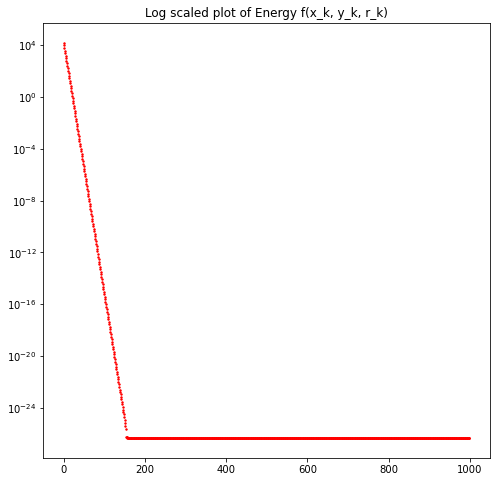

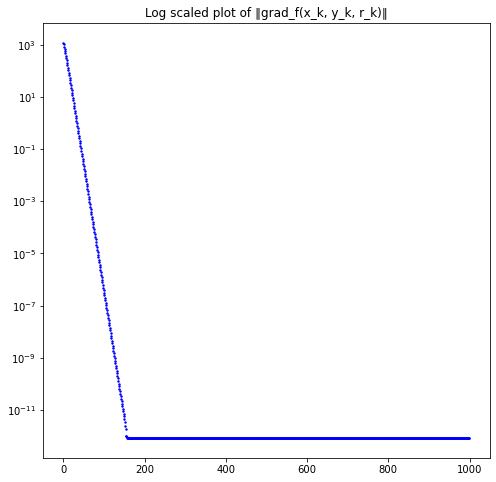

In [65]:
solve_and_plot_GN(20)

### N = 100

Epoch 0, Cost: 379313.74961334054
Epoch 100, Cost: 1.429253870242077e-14
Epoch 200, Cost: 3.6799493481564458e-25
Epoch 300, Cost: 3.6799493481564458e-25
Epoch 400, Cost: 3.6799493481564458e-25
Epoch 500, Cost: 3.6799493481564458e-25
Epoch 600, Cost: 3.6799493481564458e-25
Epoch 700, Cost: 3.6799493481564458e-25
Epoch 800, Cost: 3.6799493481564458e-25
Epoch 900, Cost: 3.6799493481564458e-25
The centre of the solution is (0.9828818459630771, 0.9997700298651881), the radius is 3.0338623963577103.


(0.9828818459630771, 0.9997700298651881, 3.0338623963577103)

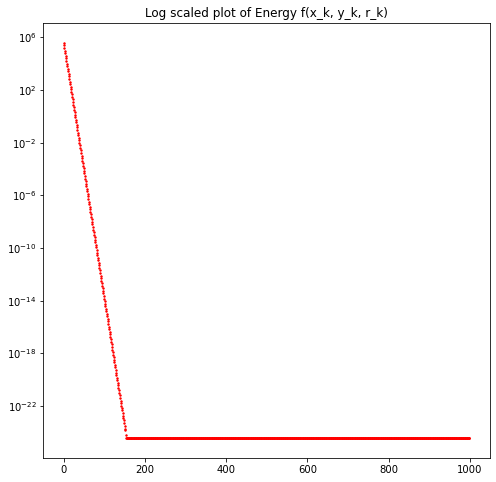

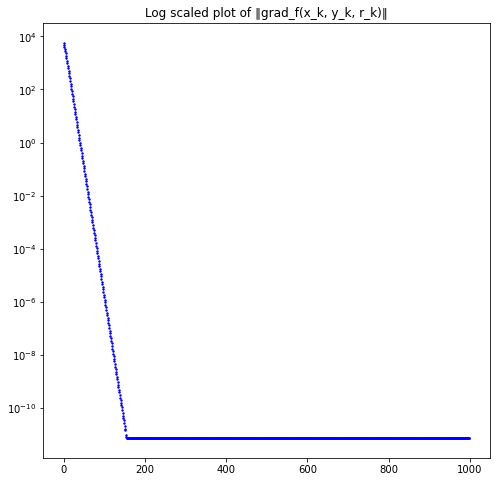

In [66]:
solve_and_plot_GN(100)

### N = 1000

Epoch 0, Cost: 35529559.633986846
Epoch 100, Cost: 1.3373958114769415e-12
Epoch 200, Cost: 2.3776346569451818e-23
Epoch 300, Cost: 2.3776346569451818e-23
Epoch 400, Cost: 2.3776346569451818e-23
Epoch 500, Cost: 2.3776346569451818e-23
Epoch 600, Cost: 2.3776346569451818e-23
Epoch 700, Cost: 2.3776346569451818e-23
Epoch 800, Cost: 2.3776346569451818e-23
Epoch 900, Cost: 2.3776346569451818e-23
The centre of the solution is (1.0093252858768542, 1.011451108143169), the radius is 2.9987499873352497.


(1.0093252858768542, 1.011451108143169, 2.9987499873352497)

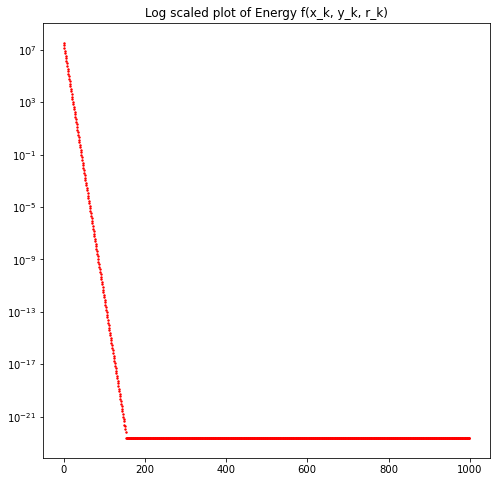

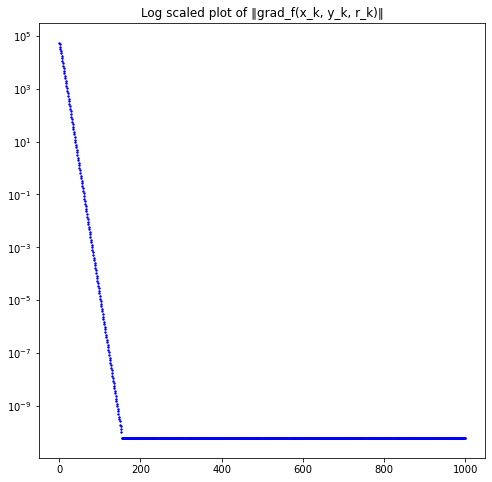

In [67]:
solve_and_plot_GN(1000)

In each case the method is stuck after less than 200 iterates, which is always quite close to the solution, and as we expect increasing the number of points leads to better performance.

### Bonus

In [81]:
from scipy.optimize import least_squares
res = least_squares(lambda params: f(params[0], params[1], params[2], x_data, y_data), np.random.rand(3))
res.x

array([1.28851695, 1.36553149, 3.0135603 ])

Scipy's function approximated well the radius, but the centers are relatively far from the solution, as they are 1.20 and 1.17 instead of 1 and 1, so our implemented functions work better than this built-in one.